Стартап

Цель исследования: 
1. Изучить пользователей, их количество и действия на сайте
2. Посмотреть зависимость групп
3. Чем группы отличаются друг от друга
4. Составить воронку пользователей
5. Проверить гипотезы и выявить верные ли шаги предприняли маркетологи.

План работы: 
1. Загрузить данные и обработай их под нужный нам формат
2. Изучить и проверить данные на пропуски и дубликаты
3. Выявить время за которое пользователи наиболее активны
4. Делаем воронку событий
5. Выявить на каком этапе больше всего пользователей теряются 
6. Провести z-test 
7. Выявить гипотезы
8. Вывод по работе 

# Шаг 1 Открыть файл и изучить данные

In [1]:

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
import seaborn as sns
from plotly import graph_objects as go
import math
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/logs_exp.csv',delimiter='\t')

In [3]:
data.head(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


In [4]:
display(data)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


# Шаг 2 Подготовка данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


В Столбце EventTimestamp надо поменять тип данных на datetime

In [6]:
data.columns=['event_name','user_id','event_timestamp','group']

In [7]:
data.isna().sum()

event_name         0
user_id            0
event_timestamp    0
group              0
dtype: int64

In [8]:
data.duplicated().sum()

413

In [9]:
data[data.duplicated()==True].head(40)

,event_name,user_id,event_timestamp,group
453,MainScreenAppear,5613408041324010552,1564474784,248
2350,CartScreenAppear,1694940645335807244,1564609899,248
3573,MainScreenAppear,434103746454591587,1564628377,248
4076,MainScreenAppear,3761373764179762633,1564631266,247
4803,MainScreenAppear,2835328739789306622,1564634641,248
5641,CartScreenAppear,4248762472840564256,1564637764,248
5875,PaymentScreenSuccessful,6427012997733591237,1564638452,248
7249,OffersScreenAppear,7224691986599895551,1564641846,246
8065,CartScreenAppear,8189122927585332969,1564643929,248
9179,MainScreenAppear,2230705996155527339,1564646087,246


Имеются по 2,3,4 и больше раз повторений дубликатов. имеет смысл удалить дубликаты

In [10]:
data = data.drop_duplicates()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       243713 non-null  object
 1   user_id          243713 non-null  int64 
 2   event_timestamp  243713 non-null  int64 
 3   group            243713 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 9.3+ MB


Было 244126 строк, стало 243713. Все верно, дубликаты удалились

In [12]:
def a1a2b_group(gr):
    if gr==246:
        return 'A1'
    elif gr==247:
        return 'A2'
    elif gr==248:
        return 'B'
    else:
        return 'UnknownGroup'

data['group'] = data['group'].apply(a1a2b_group)
data

,event_name,user_id,event_timestamp,group
0,MainScreenAppear,4575588528974610257,1564029816,A1
1,MainScreenAppear,7416695313311560658,1564053102,A1
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B
3,CartScreenAppear,3518123091307005509,1564054127,B
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,A2
244122,MainScreenAppear,5849806612437486590,1565212439,A1
244123,MainScreenAppear,5746969938801999050,1565212483,A1
244124,MainScreenAppear,5746969938801999050,1565212498,A1


In [13]:
data = data.reset_index(drop=True)
data

,event_name,user_id,event_timestamp,group
0,MainScreenAppear,4575588528974610257,1564029816,A1
1,MainScreenAppear,7416695313311560658,1564053102,A1
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B
3,CartScreenAppear,3518123091307005509,1564054127,B
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B
...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,A2
243709,MainScreenAppear,5849806612437486590,1565212439,A1
243710,MainScreenAppear,5746969938801999050,1565212483,A1
243711,MainScreenAppear,5746969938801999050,1565212498,A1


In [14]:
data['datetime'] = pd.to_datetime(data['event_timestamp'],unit='s')

In [15]:
data

,event_name,user_id,event_timestamp,group,datetime
0,MainScreenAppear,4575588528974610257,1564029816,A1,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,A1,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,B,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B,2019-07-25 11:48:42
...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,A2,2019-08-07 21:12:25
243709,MainScreenAppear,5849806612437486590,1565212439,A1,2019-08-07 21:13:59
243710,MainScreenAppear,5746969938801999050,1565212483,A1,2019-08-07 21:14:43
243711,MainScreenAppear,5746969938801999050,1565212498,A1,2019-08-07 21:14:58


In [16]:
data['date'] = data['datetime'].dt.date
data

,event_name,user_id,event_timestamp,group,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,A1,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,A1,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,A2,2019-08-07 21:12:25,2019-08-07
243709,MainScreenAppear,5849806612437486590,1565212439,A1,2019-08-07 21:13:59,2019-08-07
243710,MainScreenAppear,5746969938801999050,1565212483,A1,2019-08-07 21:14:43,2019-08-07
243711,MainScreenAppear,5746969938801999050,1565212498,A1,2019-08-07 21:14:58,2019-08-07


In [17]:
data['user_id'].nunique()

7551

In [18]:
a = data[data['group'] == 'A1']['user_id'].nunique()

In [19]:
b = data[data['group'] == 'A2']['user_id'].nunique()
b

2520

In [20]:
c = data[data['group'] == 'B']['user_id'].nunique()
c

2542

In [21]:
a+b+c

7551

В каждой группе свои уникальные пользователи, так как сумма числа пользователей совпадает с общим числом пользователей. Если бы пользователи были в двух группах, было бы превышение этой суммы.

Вывод: На этапе предобработки данных нам удалось заменить названия столбцов, изменить формат даты и добавить стобец с датой, проверить дубликаты и удалить 413 дубликатов, присвоить группам удобные для работы значения. 

# Шаг 3. Изучить и проверить данные

## Количество событий

In [22]:
data['event_name'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64

In [23]:
data['event_name'].count()

243713

## Количество пользователей

In [24]:
users = len(data['user_id'].unique())
users

7551

## В среднем событий приходится на пользователя

In [25]:
data.groupby('user_id').agg({'event_name': 'count'})

,event_name
user_id,
6888746892508752,1
6909561520679493,5
6922444491712477,47
7435777799948366,6
7702139951469979,137
...,...
9217594193087726423,9
9219463515465815368,17
9220879493065341500,7


In [26]:
data['event_name'].count() / users

32.27559263673685

## Распределение данных во времени

In [27]:
data

,event_name,user_id,event_timestamp,group,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,A1,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,A1,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,A2,2019-08-07 21:12:25,2019-08-07
243709,MainScreenAppear,5849806612437486590,1565212439,A1,2019-08-07 21:13:59,2019-08-07
243710,MainScreenAppear,5746969938801999050,1565212483,A1,2019-08-07 21:14:43,2019-08-07
243711,MainScreenAppear,5746969938801999050,1565212498,A1,2019-08-07 21:14:58,2019-08-07


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   user_id          243713 non-null  int64         
 2   event_timestamp  243713 non-null  int64         
 3   group            243713 non-null  object        
 4   datetime         243713 non-null  datetime64[ns]
 5   date             243713 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 11.2+ MB


In [29]:
data['date'] = data['date'].astype('datetime64')

Минимальная дата

In [30]:
data['datetime'].min()

Timestamp('2019-07-25 04:43:36')

Максимальная дата

In [31]:
data['datetime'].max()

Timestamp('2019-08-07 21:15:17')

Период времени

In [32]:
data['datetime'].max() - data['datetime'].min()

Timedelta('13 days 16:31:41')

In [33]:
temp = data.groupby('date').agg({'event_name':'count'}).reset_index()

In [34]:
temp

,date,event_name
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,412
6,2019-07-31,2030
7,2019-08-01,36141
8,2019-08-02,35554
9,2019-08-03,33282


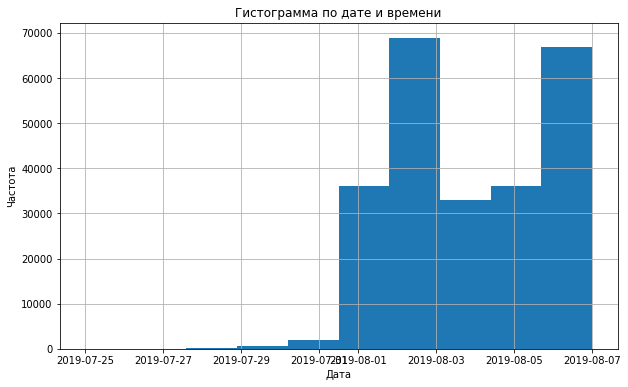

In [35]:
plt.figure(figsize=(10,6))
data['date'].hist()
plt.ylabel('Частота')
plt.xlabel('Дата')
plt.title('Гистограмма по дате и времени')
plt.show()

В основном, активный период начинается в августе. Можно сделать срез по август

In [36]:
data_clean = data.loc[data['date'] > '2019-07-31']  

In [37]:
data_clean

,event_name,user_id,event_timestamp,group,datetime,date
2826,Tutorial,3737462046622621720,1564618048,A1,2019-08-01 00:07:28,2019-08-01
2827,MainScreenAppear,3737462046622621720,1564618080,A1,2019-08-01 00:08:00,2019-08-01
2828,MainScreenAppear,3737462046622621720,1564618135,A1,2019-08-01 00:08:55,2019-08-01
2829,OffersScreenAppear,3737462046622621720,1564618138,A1,2019-08-01 00:08:58,2019-08-01
2830,MainScreenAppear,1433840883824088890,1564618139,A2,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,A2,2019-08-07 21:12:25,2019-08-07
243709,MainScreenAppear,5849806612437486590,1565212439,A1,2019-08-07 21:13:59,2019-08-07
243710,MainScreenAppear,5746969938801999050,1565212483,A1,2019-08-07 21:14:43,2019-08-07
243711,MainScreenAppear,5746969938801999050,1565212498,A1,2019-08-07 21:14:58,2019-08-07


## Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [38]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240887 entries, 2826 to 243712
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       240887 non-null  object        
 1   user_id          240887 non-null  int64         
 2   event_timestamp  240887 non-null  int64         
 3   group            240887 non-null  object        
 4   datetime         240887 non-null  datetime64[ns]
 5   date             240887 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 12.9+ MB


Было 243713 значений, после фильтрации стало 240887

In [39]:
#a = len(data) - len(data_clean)
#c = round((a / len(data))*100,2)
#c

In [40]:
data['user_id'].nunique()

7551

In [41]:
#print('В результате фильтрации мы потеряли %d событий' % a)

In [42]:
#b = len(data['user_id'].unique()) -len(data_clean['user_id'].unique())

In [43]:
#print('В результате фильтрации мы потеряли %d пользователей' % b)

In [44]:
print(f'Было событий = {len(data)} , Стало = {len(data_clean)} , На сколько уменьшилось = {len(data) - len(data_clean)} , Потяря = {round(((len(data) - len(data_clean))/len(data))*100,2)}%')

Было событий = 243713 , Стало = 240887 , На сколько уменьшилось = 2826 , Потяря = 1.16%


In [45]:
old = data['user_id'].nunique()
new = data_clean['user_id'].nunique()

In [46]:
print(f'Было пользователей = {old} / Стало = {new} / На сколько уменьшилось = {old-new} / Потяря = {round(((old-new)/old)*100,2)}%')



Было пользователей = 7551 / Стало = 7534 / На сколько уменьшилось = 17 / Потяря = 0.23%


В результате фильтрации мы потеряли 1.16% данных и 0.23%: пользователей, что может говорить о малом влиянии на дальнейшее исследования. Так как большинство данных и пользователей остались

## Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп

In [47]:
data_clean.groupby('group').agg({'user_id':'count'})

,user_id
group,
A1,79302
A2,77022
B,84563


# Шаг 4. Изучить воронку событий

## Изучаем воронку событий

In [48]:
data_clean['event_name'].value_counts()


MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

In [49]:
users = data_clean.groupby('event_name').agg({'user_id':'nunique'}).sort_values(by='user_id',ascending=False).rename(columns={'user_id':'total_users'})
users['users_event'] = round(users['total_users'] / users['total_users'].sum() * 100,2)
users = users.reset_index()
users

,event_name,total_users,users_event
0,MainScreenAppear,7419,36.86
1,OffersScreenAppear,4593,22.82
2,CartScreenAppear,3734,18.55
3,PaymentScreenSuccessful,3539,17.59
4,Tutorial,840,4.17


In [50]:
user_events = data_clean.groupby('event_name').agg({'event_name':'count', 'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
user_events.columns = ['n_events', 'users']
user_events = user_events.reset_index()
user_events['users_part_1st_event'] = (user_events['users'] / new * 100).round(1) 
user_events

,event_name,n_events,users,users_part_1st_event
0,MainScreenAppear,117328,7419,98.5
1,OffersScreenAppear,46333,4593,61.0
2,CartScreenAppear,42303,3734,49.6
3,PaymentScreenSuccessful,33918,3539,47.0
4,Tutorial,1005,840,11.1


Text(0.5, 1.0, 'События по числу пользователей')

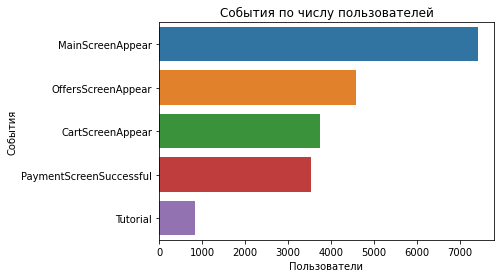

In [51]:
sns.barplot(x='total_users',y='event_name',data=users)
plt.xlabel('Пользователи')
plt.ylabel('События')
plt.title('События по числу пользователей')

Text(0.5, 1.0, 'Доли пользователей совершивших хоть одно событие от всех пользователей')

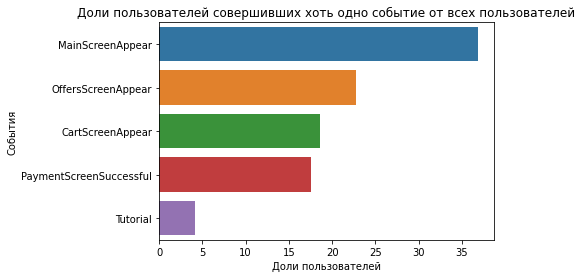

In [52]:
sns.barplot(x='users_event',y='event_name',data=users)
plt.xlabel('Доли пользователей')
plt.ylabel('События')
plt.title('Доли пользователей совершивших хоть одно событие от всех пользователей')

## Предположите, в каком порядке происходят события.

1. MainScreenAppear - Появление Главного экрана - Зашли на сайт
2. OffersScreenAppear - Появление Экрана Предложений - Искали товар по каталогу
3. CartScreenAppear - Появление Экрана Корзины - Добавили в корзину
4. PaymentScreenSuccessful - Экран Платеж Успешен - Оплатили

In [53]:
users = users[users['event_name'] != 'Tutorial']
users

,event_name,total_users,users_event
0,MainScreenAppear,7419,36.86
1,OffersScreenAppear,4593,22.82
2,CartScreenAppear,3734,18.55
3,PaymentScreenSuccessful,3539,17.59


In [54]:
prev_users = users.loc[0,'total_users']
print(prev_users)

7419


In [55]:
for i in users.index:
    users.loc[i,'users_step'] = (users.loc[i,'total_users'] / prev_users * 100).round(2)
    users.loc[i,'users_step_start'] = round((users.loc[i,'total_users']/ max(users['total_users'])) * 100,2)
    prev_users = users.loc[i,'total_users']

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [56]:
users

,event_name,total_users,users_event,users_step,users_step_start
0,MainScreenAppear,7419,36.86,100.00,100.00
1,OffersScreenAppear,4593,22.82,61.91,61.91
2,CartScreenAppear,3734,18.55,81.30,50.33
3,PaymentScreenSuccessful,3539,17.59,94.78,47.70


## На каком шаге теряете больше всего пользователей?

На этапе когда пользователь заходит на сайт, на следующий этап переходит лишь 60%. Нужно проверить главный экран, там могут быть какие нибудь ошибки или баги. 

## Какая доля пользователей доходит от первого события до оплаты?

До этапа оплаты доходит примерно 48% от начального числа пользователй, которые посетили сайт. 

Выводы:
Воронка продаж идет по следующему порядку:

1. MainScreenAppear - Появление Главного экрана - Зашли на сайт
2. OffersScreenAppear - Появление Экрана Предложений - Искали товар по каталогу
3. CartScreenAppear - Появление Экрана Корзины - Добавили в корзину
4. PaymentScreenSuccessful - Экран Платеж Успешен - Оплатили

На второй этап воронки попадает 62% пользователей, а 38% "теряются по дороге". Это большая цифра и здесь необходимо веб-аналитикам выянить почему так происходит, наверняка есть возможность исправить ситуацию;

Событие "5.Tutorial" не несет полезной нагрузки, поэтому его можно не принимать во внимание;

# 5 Изучите результаты эксперимента

## Сколько пользователей в каждой экспериментальной группе?

In [57]:
data_clean.head(5)

,event_name,user_id,event_timestamp,group,datetime,date
2826,Tutorial,3737462046622621720,1564618048,A1,2019-08-01 00:07:28,2019-08-01
2827,MainScreenAppear,3737462046622621720,1564618080,A1,2019-08-01 00:08:00,2019-08-01
2828,MainScreenAppear,3737462046622621720,1564618135,A1,2019-08-01 00:08:55,2019-08-01
2829,OffersScreenAppear,3737462046622621720,1564618138,A1,2019-08-01 00:08:58,2019-08-01
2830,MainScreenAppear,1433840883824088890,1564618139,A2,2019-08-01 00:08:59,2019-08-01


In [58]:
data_clean.groupby('group').agg({'user_id':'nunique'})

,user_id
group,
A1,2484
A2,2513
B,2537


In [59]:
users_bygroup = data_clean.groupby('group')['user_id'].nunique()
#создадим столбец с суммой пользователей групп А1 и А2
users_bygroup['A1+A2'] = users_bygroup['A1'] + users_bygroup['A2']
#добавим также общую сумму пользователей
users_bygroup['all'] = users_bygroup['A1+A2'] + users_bygroup['B']
users_bygroup

group
A1       2484
A2       2513
B        2537
A1+A2    4997
all      7534
Name: user_id, dtype: int64

In [60]:
event_group_test = data_clean[data_clean['event_name']!='Tutorial'].pivot_table(
    index='event_name', 
    columns='group', 
    values='user_id',
    aggfunc='nunique').sort_values(by='A1', ascending=False)

event_group_test = event_group_test.reset_index()
event_group_test['A1+A2'] = event_group_test['A1'] + event_group_test['A2']
event_group_test['all'] = event_group_test['A1+A2'] + event_group_test['B']

event_group_test['part_A1'] = (event_group_test['A1'] / users_bygroup['A1'] * 100).round(1)
event_group_test['part_A2'] = (event_group_test['A2'] / users_bygroup['A2'] * 100).round(1)
event_group_test['part_B'] = (event_group_test['B'] / users_bygroup['B'] * 100).round(1)
event_group_test['part_A1+A2'] = ((event_group_test['A1'] + event_group_test['A2']) / \
                                  (users_bygroup['A1'] + users_bygroup['A2']) * 100).round(1)
event_group_test['part_all'] = (event_group_test['all'] / users_bygroup['all'] * 100).round(1)
event_group_test

group,event_name,A1,A2,B,A1+A2,all,part_A1,part_A2,part_B,part_A1+A2,part_all
0,MainScreenAppear,2450,2476,2493,4926,7419,98.6,98.5,98.3,98.6,98.5
1,OffersScreenAppear,1542,1520,1531,3062,4593,62.1,60.5,60.3,61.3,61.0
2,CartScreenAppear,1266,1238,1230,2504,3734,51.0,49.3,48.5,50.1,49.6
3,PaymentScreenSuccessful,1200,1158,1181,2358,3539,48.3,46.1,46.6,47.2,47.0


Количество пользователей по группам (в т.ч. и на общую группу А (А1+А2)) принявших участие в каждом действии, кроме прохождения обучения. Кроме того в дф были добавлены столбцы с отношением числа пользователей прошедших действие к общему числу пользоваетелей в группе.

## A1/A2 тест

Сформулируем гипотезы:
H0: между долями нет значимой разницы
H1: между долями есть значимая разница
Уровень статистической значимости - 0.01 Так как это является одним из условий проведения теста контрольных групп (А/А)

Произведем z-тест для сравнения долей групп в каждом событии. Создадим функйию для проведения теста по каждому действую между контрольными группами.

In [61]:
def z_test(group1, group2, alpha):
    for i in event_group_test.index:
        p1 = event_group_test[group1][i] / users_bygroup[group1]
        # пропорция успехов во второй группе:
        p2 = event_group_test[group2][i] / users_bygroup[group2]
        # пропорция успехов в комбинированном датасете:
        p_combined = ((event_group_test[group1][i] + event_group_test[group2][i]) / 
                      (users_bygroup[group1] + users_bygroup[group2]))
        # разница пропорций в датасетах
        difference = p1 - p2
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / math.sqrt(p_combined * (1 - p_combined) * 
                                        (1/users_bygroup[group1] + 1/users_bygroup[group2]))
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-значение: {}'.format(event_group_test['event_name'][i], p_value))
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        else:
            print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
        print('')
        
z_test("A1", "A2", 0.05)

MainScreenAppear p-значение: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



По результатам проведения тестирования, по каждому из произведенных действий клиентов по группам доли между группами не являются статистически разными

Полученный результат в рамках АА теста показал нам что между данными нет различий, это дает нам понять что мы можем смело продолжать делать AБ тест

Проведем тестирование между дургими группами. (А1/В), (А2/В) и (А1,2/В)
Гипотезы остаются теми же.
H0: между долями нет значимой разницы
H1: между долями есть значимая разница

## A1/B тест

In [62]:
z_test("A1", "B", 0.05)

MainScreenAppear p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



## A2/B тест

In [63]:
z_test("A2","B",0.05)

MainScreenAppear p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



## A1,2/B тест

In [64]:
z_test("A1+A2", "B", 0.05)

MainScreenAppear p-значение: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Так как для A/B теста не нужна высокая точность, то для экспериментов выбран самый стандартный уровень значимости равный 5%. При уровне значимости 0.1 только одна из проверок покажет значимую разницу, между контрольной группой A1 и экспериментальной в доле перехода пользователей в корзину(CartScreenAppear), но эта разница будет не в пользу нашей экспериментальной группы. Но при уровне значимости 0.1 каждый десятый раз можно получать ложный результат, поэтому стоит применить изначально выбранный нами уровень значимости 0.05.

## Вывод

Итак, на протяжении всего исследования мы высянили, что мы можем брать в работу данные относязиеся к временному периоду с 2019-07-31 21:00:57 по 2019-08-07 21:15:17. Выяснили, что большинство пользователей теряется при переходе с главной страницы приложения к странице с предложением товара. Определили последовательность действий покупателей. Составили воронку покупателей по группам. Выяснили, что прохождения туториала для покупателей не является обязательным и исключили это действие из исследования. Провели 16 тестов по каждому действию мужду группами. При проведении 16 тестов значимой разницы между группами не выявлено. В условии проекта задается вопрос о влиянии смены шрифта на пользователей. По итогам теста можно сказать, что на поведение пользователей изменение шрифта значимого эффекта не оказало. Тестирование можно назвать успешным - изменение шрифта не повлияло на поведение пользователей.